Standart olan kütüphaneleri import etme, veri setlerini çağırma ve veri setinde gerekli düzenlemeleri yapma işlemlerini gerçekleştirelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [4]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

In [5]:
#barPlot1 dökümanı
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

In [6]:
#barPlot2 dökümanı
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

In [7]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])

In [8]:
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)

In [9]:
data.sort_values('area_poverty_ratio',inplace=True)

manner of death, insanın öldürülme şeklini ifade eder. 

İki adet öldürülme şekli var: 🟢shot(ateş edilerek) 🟢 shot and Tasered (ateş edilerek ve şok tabancası ile)

Aynı zamanda öldürülen insanların cinsiyetlerini (gender) gözlemlemek istiyoruz. 

Aynı zamanda öldürülen insanların yaşını (age) gözlemlemek istiyoruz. 

Bu amaçlar için box plot çok kullanışlıdır.

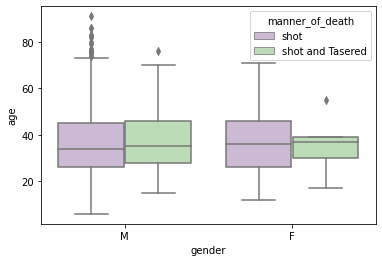

In [10]:
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

Yukarıdaki kod bloğunu açıklayalım. 

data=kill parametresi ile data olarak kill değişkeninde tutulan veri setini kullanacağımızı belirtiyoruz. 

palette="PRGn" parametresi ile renk ayarlanır.

x="gender" parametresi ile veri setindeki gender sütunundan unique değerler alınır ve bu değerler M ve F şeklindedir. Seaborn kütüphanesi x eksenini M ve F şeklinde ikiye ayırır.

y="age" parametresi ile yaşın sayısal değerleri y eksenine yerleştirilir.

hue="manner_of_death" parametresi ile manner_of_death sütunundaki unique değerler (shot ve shot and Tasered) alınır. hue, class demektir. Bir x ekseninde class'larına ayırma işlemi var birde görselleştirirken class'a ayırma işlemi var. Görselde mor kısım shot, yeşil kısım shot and Tasered'i ifade eder. 

<font color = 'Peach'>
    
Çıktıyı yorumlayalım. 

Sol tarafta yer alan erkek (M) cinsiyetine ait figürü açıklayalım. Vurulan insanların yaşlarının medyanı(mor dörtgenin ortasındaki çizgi)(medyanı, ortalama şeklindede düşünebilirsiniz) ölüm şekli shot and Tasered olanlara göre daha azdır.

Kadınlarda (sağ taraftaki figür) şok tabancası ile öldürülenlerin sayısı çok fazla değil. Yani dağılımı geniş değil gördüğünüz üzere.

Kadınlarda shot ve shot and Tasered şekilleri ile öldürülenlerin yaş ortalamaları hemen hemen aynı.

Mesela sağ figürün en üst kısmındaki noktalar outlier'dır. Outlier'ın ne olduğu önceki dökümanlarda mevcut. Mesela cinsiyeti erkek olan ve 80 'den büyük yaşı olan bir vatandaş vurularak öldürülmüş. Bu outlier bir durumdur. Çünkü yaş ortalaması genelde 30 civarıymış (mor figürün ortasındaki çizgiden anlıyoruz).